In [1]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()

###### Some plt choices ###########
plt.rcParams['figure.figsize'] = (8,6)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 2
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
##########################################
#plt.rc('text', usetex=True) # For high-quality LaTeX (but very slow)

# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [2]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
#plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

Rsun= 6.9598e10
secyer=3600*24*365

In [3]:
#planets plotted
K2137b=0.00482
Trappist1b=0.01151
HATS67b=0.03
K239b=0.057

def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

def ConstRadius():
    # Add Constant radius lines:
    teff=np.arange(1000,30000,1)
    y1= np.log10(const_radius_on_hrd(teff,0.1*c.au)/c.lsun)
    y2= np.log10(const_radius_on_hrd(teff,0.01*c.au)/c.lsun)
    plt.plot(np.log10(teff),y1,linestyle='--',linewidth=1,color='grey', alpha=0.4)
    plt.plot(np.log10(teff),y2,linestyle='--',linewidth=1,color='grey', alpha=0.4)
    plt.fill_between(np.log10(teff), y1 , y2 ,facecolor='grey', alpha=0.05)
    #plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,K2137b*c.au)/c.lsun),linestyle='-',linewidth=2, alpha=0.3,\
    #         label= ' K2137 b, 0.004 AU')
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,Trappist1b*c.au)/c.lsun),linestyle='-',linewidth=3, alpha=0.5,\
             label= ' Trappist-1 b, 0.01 AU', c = RED_PURPLE)
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,HATS67b*c.au)/c.lsun),linestyle='-',linewidth=3, alpha=0.5,\
             label= ' HATS-67 b, 0.03 AU', c = BLUE_GREEN)
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,K239b*c.au)/c.lsun),linestyle='-',linewidth=3, alpha=0.5,\
             label= ' K239 b, 0.06 AU', c = SKY_BLUE)
    legend = plt.legend(loc='lower left', markerscale=15, fancybox=True, prop={'size': 17}) #borderpad=0.2
    #change x in 0.01 increments
    #change y in 0.02 increments
    

In [63]:

DATA='./1M4R/'

DATA='./1M10R/' 

DATA='./test/' 

DATA ='./1M10R_hp_hydro/'

DATA ='./1M4R_10MJ_hp_hydro/'



h=mr.MesaData(DATA+'/LOGS/history.data')


eng_f=h.Engulfed_fraction
dest_f=10**h.Log_Destruction_factor
planet_location=h.Orbital_separation
star_radius=10**h.log_R
model= h.model_number
age=h.star_age
logdt=h.log_dt
logl=h.log_L
logt=h.log_Teff

tidal = np.where(eng_f == 0)
grazing = np.where((0 < eng_f) & (eng_f < 0.999))
plungein= np.where((eng_f == 1) & (dest_f < 1))
relaxation = np.where((eng_f == 1) & (dest_f > 1))


DATAS=['./1M4R/','./1M10R/']#,'./1M4R_10MJ_hp_hydro/'] 

From read_log_data  5
From read_log_data header: ['r21.12.1', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20221226', 50.0, 1000.0, 1.9884098706980504e+33, 69570000000.0, 3.828e+33]


From read_log_data  5
From read_log_data header: ['r22.11.1', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20221116', 50.0, 1000.0, 1.9884098706980504e+33, 69570000000.0, 3.828e+33]
From read_log_data  5
From read_log_data header: ['r22.11.1', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20221115', 50.0, 1000.0, 1.9884098706980504e+33, 69570000000.0, 3.828e+33]


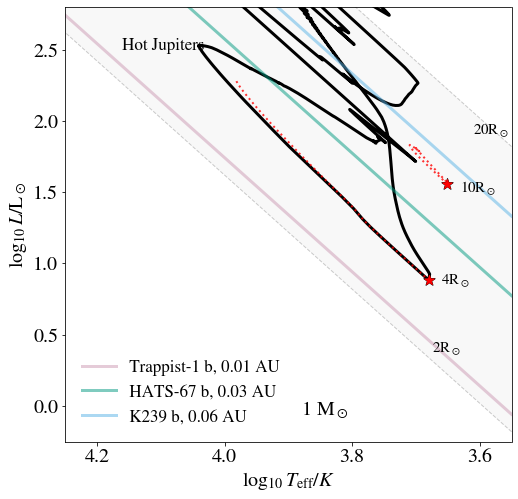

In [64]:
plt.figure(figsize=(8,8))
logle=h.log_L
logte=h.log_Teff
plt.plot(logte,logle,linewidth=3,c='black')

for DAT in DATAS:
    hh=mr.MesaData(DAT+'/LOGS/history.data')
    logl=hh.log_L
    logt=hh.log_Teff
    
    plt.plot(logt,logl,linewidth=2,c='red',alpha=0.8,ls=':')
    plt.scatter(logt[0],logl[0],marker='*',s=140,color='black',zorder=2)
    plt.scatter(logt[0],logl[0],marker='*',s=100,color='red',zorder=3)

#plt.axis([3.87,3.65, 1, 2.1])
plt.xlabel(r'$\log_{10} \, T_{\rm eff} / K $')
plt.ylabel(r'$\log_{10}\, L / {\rm L}_\odot $')
plt.gca().invert_xaxis()
plt.annotate(r'1 M$_\odot$',(3.88, -0.06),fontsize=20)

plt.annotate(r'2R$_\odot$',(3.675, 0.375),fontsize=15)
plt.annotate(r'4R$_\odot$',(3.66, 0.85),fontsize=15)
plt.annotate(r'10R$_\odot$',(3.63, 1.5),fontsize=15)
plt.annotate(r'20R$_\odot$',(3.61, 1.9),fontsize=15)

plt.annotate('Hot Jupiters',(4.16, 2.5),fontsize=17)

plt.axis([4.25, 3.55, -0.25, 2.8])
ConstRadius()

#plt.savefig("./paper/hrd.pdf",bbox_inches='tight')

In [65]:
# Set zero time to be the beginning of full engulfment (end of grazing phase)
age = age-age[plungein][0]

From read_log_data  5
From read_log_data header: ['r21.12.1', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20221226', 50.0, 1000.0, 1.9884098706980504e+33, 69570000000.0, 3.828e+33]


Text(0, 0.5, 'Mach')

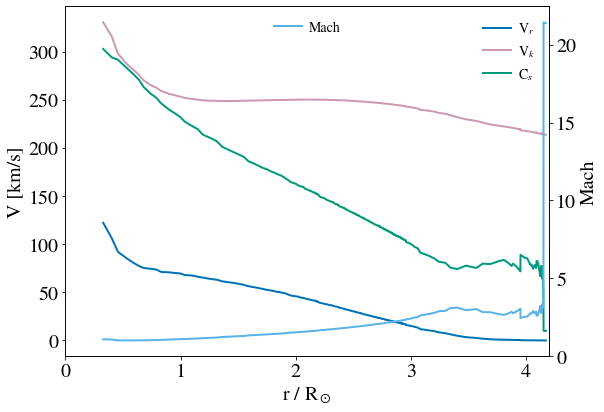

In [70]:
fig = plt.figure()
ax = fig.add_axes([0.13, 0.12, 0.84, 0.81])
    
h=mr.MesaData(DATA+'/LOGS/history.data')
eng_f=h.Engulfed_fraction
dest_f=10**h.Log_Destruction_factor
planet_location=h.Orbital_separation
#planet_location=h.Orbital_separation
#star_radius=10**h.log_R
Infall_velocity= h.Infall_velocity
Sound_speed=h.Sound_speed
Orbital_velocity=h.Orbital_velocity
age=h.star_age
#logdt=h.log_dt
logl=h.log_L
logt=h.log_Teff
tidal = np.where(eng_f == 0)
grazing = np.where((0 < eng_f) & (eng_f < 0.999))
plungein= np.where((eng_f == 1) & (dest_f < 1))
relaxation = np.where((eng_f == 1) & (dest_f > 1))
age = age-age[plungein][0]
gp = np.concatenate((grazing,plungein), axis=None)
# plt.plot(age[gp],planet_location[gp],linewidth=lw,alpha=alpha,label=LABELS[i],c=COLORS[i])
ax.plot(h.Orbital_separation[gp],Infall_velocity[gp],linewidth=2,alpha=1.0,label=r'V$_r$',c=BLUE)
ax.plot(h.Orbital_separation[gp],Orbital_velocity[gp],linewidth=2,alpha=1.0,label=r'V$_k$',c=RED_PURPLE)
ax.plot(h.Orbital_separation[gp],Sound_speed[gp],linewidth=2,alpha=1.0,label=r'C$_s$',c=BLUE_GREEN)

axb = ax.twinx()
axb.plot(h.Orbital_separation[gp],Orbital_velocity[gp]/Sound_speed[gp],linewidth=2,alpha=1.0,label=r'Mach',c=SKY_BLUE)


ax.legend(loc=1)
axb.legend(loc=9)
#plt.ylim(0,10)
ax.set_xlim(0,4.2)

ax.set_xlabel(r'r / R$_\odot$')
ax.set_ylabel(r'V [km/s]')
axb.set_ylabel(r'Mach')
#plt.ylabel(r'$\log$ Energy (erg)')
#plt.xlabel(r'Enclosed Mass (M$_\odot$)')


4.3046887063278604e-08
4.288952280136535e-08 1.4568291488047036


Text(0.5, 0, 'Time (yr)')

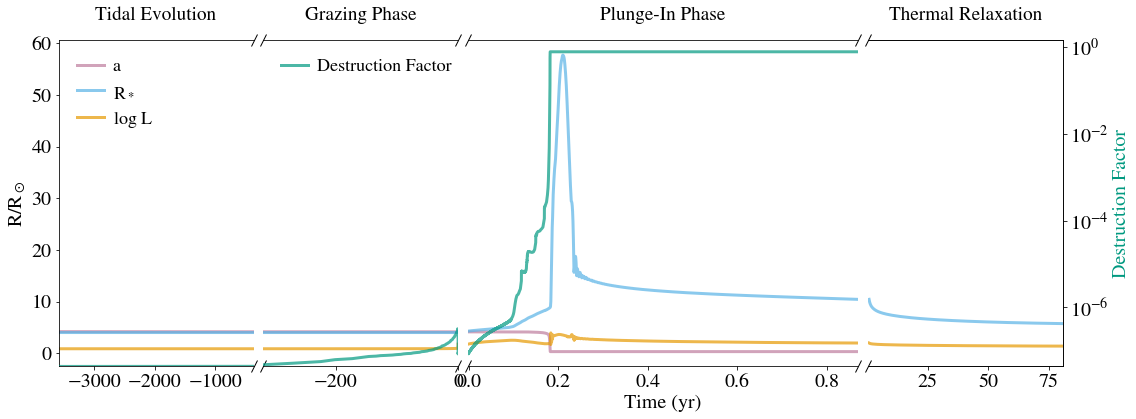

In [67]:
dest=10**h.Log_Destruction_factor
print(dest[tidal][0])
# use width_ratios to define the width of each subplot
# depending on the range we want to plot
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, facecolor='w',
                                  gridspec_kw={'width_ratios': (1, 1, 2, 1)},figsize=(18,6))
plt.subplots_adjust(wspace=0.04, hspace=0)

ax1.plot(age[tidal],planet_location[tidal],linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
ax2.plot(age[grazing],planet_location[grazing],linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
ax3.plot(age[plungein],planet_location[plungein],linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
#ax4.plot(age,planet_location,linewidth=2,alpha=0.7,label=' Orbital Separation',c='black')

ax1.plot(age[tidal],star_radius[tidal],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax2.plot(age[grazing],star_radius[grazing],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax3.plot(age[plungein],star_radius[plungein],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax4.plot(age[relaxation],star_radius[relaxation],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)

ax1.plot(age[tidal],logl[tidal],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax2.plot(age[grazing],logl[grazing],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax3.plot(age[plungein],logl[plungein],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax4.plot(age[relaxation],logl[relaxation],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)

# hide the spines between ax and ax3
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# Move right hand axes ticks to right hand side
ax4.yaxis.tick_right()

# Turn off ticks on middle axes; so we don't affect the other
# axes ticks, let's just set the length to 0 here
ax2.tick_params(axis='y', length=0)
ax3.tick_params(axis='y', length=0)
ax4.tick_params(axis='y', length=0)

# Draw the diagonal lines to show broken axes
d = 2.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([1, 1], [0, 1], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 0], [0, 1], transform=ax3.transAxes, **kwargs)
ax3.plot([1, 1], [0, 1], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 0], [0, 1], transform=ax4.transAxes, **kwargs)


ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()


ax3b.tick_params(axis='y', length=0)
ax1b.set_yticklabels([])
ax2b.set_yticklabels([])
ax3b.set_yticklabels([])

ax2b.tick_params(axis='y', length=0)
ax3b.tick_params(axis='y', length=0)

ax4b.spines['left'].set_visible(False)

ax1b.axis('off')
ax2b.axis('off')
ax3b.axis('off')

#ax1b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
#ax2b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
#ax3b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
##ax4b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')

#ax4b.set_ylabel(r'v$_{\rm orb}$ (km/s)', color='g')


ax1b.plot(age[tidal],dest[tidal],linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax2b.plot(age[grazing],dest[grazing],linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax3b.plot(age[plungein],dest[plungein],linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax4b.plot(age[relaxation],dest[relaxation],linewidth=3,alpha=0.0,label=r'Destruction Factor',c=BLUE_GREEN)

#ax1b.plot(age ,dest ,linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
#ax2b.plot(age ,dest ,linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
#ax3b.plot(age ,dest ,linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
#ax4b.plot(age ,dest ,linewidth=3,alpha=0.0,label=r'Destruction Factor',c=BLUE_GREEN)

ax4b.set_ylabel('Destruction Factor', color=BLUE_GREEN)

ax1b.set_yscale('log')
ax2b.set_yscale('log')
ax3b.set_yscale('log')
ax4b.set_yscale('log')

ax1.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)
ax2b.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)

# Axis limits

ax1.set_xlim(age[tidal][0],age[tidal][-1])  # x-axis range limited to 0 - 100 
ax2.set_xlim(age[grazing][0], age[grazing][-1]+0.3)  # x-axis range limited to 250 - 300
ax3.set_xlim(age[plungein][0]-0.001, age[plungein][-1]+0.001)  # x-axis range limited to 400 - 500
ax4.set_xlim(age[relaxation][0]-0.5, age[relaxation][0]+80)  # x-axis range limited to 400 - 500

dy = 0
print(min(dest),max(dest))
ax1b.set_ylim(min(dest)-dy,max(dest)+dy)  # x-axis range limited to 0 - 100 
ax2b.set_ylim(min(dest)-dy,max(dest)+dy)  # x-axis range limited to 250 - 300
ax3b.set_ylim(min(dest)-dy,max(dest)+dy)  # x-axis range limited to 400 - 500
ax4b.set_ylim(min(dest)-dy,max(dest)+dy)  # x-axis range limited to 400 - 500

ax1.set_title('Tidal Evolution')
ax2.set_title('Grazing Phase')
ax3.set_title('Plunge-In Phase')
ax4.set_title('Thermal Relaxation')

ax1.set_ylabel(r'R/${\rm R}_\odot$')
ax3.set_xlabel(r'Time (yr)')

#plt.savefig("./paper/evolution2.pdf",bbox_inches='tight')

4.3046887063278604e-08
0.8810318252511006 3.954466767339314


Text(0.5, 0, 'Time (yr)')

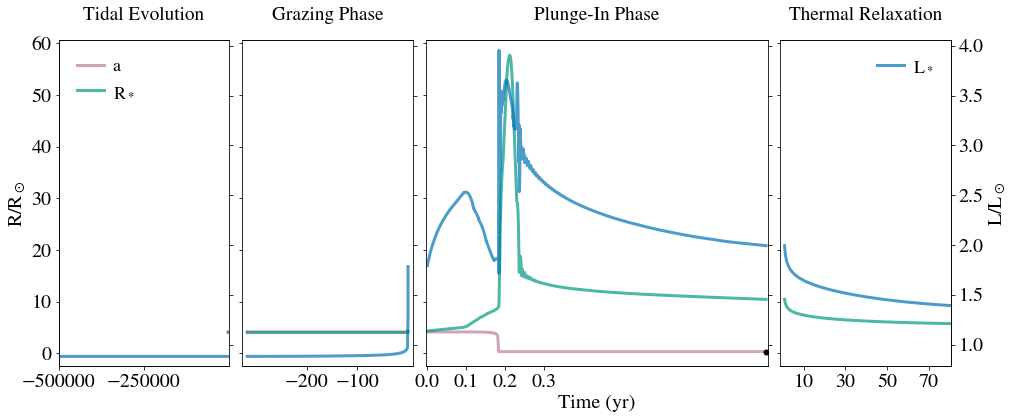

In [68]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.7
lw = 3

dest=10**h.Log_Destruction_factor
print(dest[tidal][0])
# use width_ratios to define the width of each subplot
# depending on the range we want to plot
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, facecolor='w',
                                  gridspec_kw={'width_ratios': (1, 1, 2, 1)},figsize=(16,6))
plt.subplots_adjust(wspace=0.06, hspace=0)

ax1.plot(age[tidal],planet_location[tidal],linewidth=lw,alpha=0.9,label='a',c=RED_PURPLE)
ax2.plot(age[grazing],planet_location[grazing],linewidth=lw,alpha=0.9,label='a',c=RED_PURPLE)
ax3.plot(age[plungein],planet_location[plungein],linewidth=lw,alpha=0.9,label='a',c=RED_PURPLE)
#ax4.plot(age,planet_location,linewidth=2,alpha=alpha,label=' Orbital Separation',c='black')

ax1.plot(age[tidal],star_radius[tidal],linewidth=lw,alpha=alpha,label=r'R$_*$',c=BLUE_GREEN)
ax2.plot(age[grazing],star_radius[grazing],linewidth=lw,alpha=alpha,label=r'R$_*$',c=BLUE_GREEN)
ax3.plot(age[plungein],star_radius[plungein],linewidth=lw,alpha=alpha,label=r'R$_*$',c=BLUE_GREEN)
ax4.plot(age[relaxation],star_radius[relaxation],linewidth=lw,alpha=alpha,label=r'R$_*$',c=BLUE_GREEN)

ax3.scatter(age[plungein][-2],planet_location[plungein][-2],marker = 'o',s=25,c='black',zorder=10)

#ax1.plot(age[tidal],logl[tidal],linewidth=lw,alpha=alpha,label=r'$\log$ L',c=ORANGE)
#ax2.plot(age[grazing],logl[grazing],linewidth=lw,alpha=alpha,label=r'$\log$ L',c=ORANGE)
#ax3.plot(age[plungein],logl[plungein],linewidth=lw,alpha=alpha,label=r'$\log$ L',c=ORANGE)
#ax4.plot(age[relaxation],logl[relaxation],linewidth=lw,alpha=alpha,label=r'$\log$ L',c=ORANGE)

# hide the spines between ax and ax3
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# Move right hand axes ticks to right hand side
ax4.yaxis.tick_right()

# Turn off ticks on middle axes; so we don't affect the other
# axes ticks, let's just set the length to 0 here

#ax2.tick_params(axis='y', length=0)
#ax3.tick_params(axis='y', length=0)
#ax4.tick_params(axis='y', length=0)

# Draw the diagonal lines to show broken axes
#d = 2.  # proportion of vertical to horizontal extent of the slanted line
#kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

#ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
#ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
#ax2.plot([1, 1], [0, 1], transform=ax2.transAxes, **kwargs)
#ax3.plot([0, 0], [0, 1], transform=ax3.transAxes, **kwargs)
#ax3.plot([1, 1], [0, 1], transform=ax3.transAxes, **kwargs)
#ax4.plot([0, 0], [0, 1], transform=ax4.transAxes, **kwargs)


ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()


#ax3b.tick_params(axis='y', length=0)
ax1b.set_yticklabels([])
ax2b.set_yticklabels([])
ax3b.set_yticklabels([])

#ax2b.tick_params(axis='y', length=0)
#ax3b.tick_params(axis='y', length=0)

#ax4b.spines['left'].set_visible(False)

#ax1b.axis('off')
#ax2b.axis('off')
#ax3b.axis('off')

#ax1b.plot(age,v_orb,linewidth=lw,alpha=alpha,label=r'v$_{\rm orb}$',c='g')
#ax2b.plot(age,v_orb,linewidth=lw,alpha=alpha,label=r'v$_{\rm orb}$',c='g')
#ax3b.plot(age,v_orb,linewidth=lw,alpha=alpha,label=r'v$_{\rm orb}$',c='g')
##ax4b.plot(age,v_orb,linewidth=lw,alpha=alpha,label=r'v$_{\rm orb}$',c='g')

#ax4b.set_ylabel(r'v$_{\rm orb}$ (km/s)', color='g')


ax1b.plot(age[tidal],logl[tidal],linewidth=lw,alpha=alpha,label=r'L$_*$',c=BLUE)
ax2b.plot(age[grazing],logl[grazing],linewidth=lw,alpha=alpha,label=r'L$_*$',c=BLUE)
ax3b.plot(age[plungein],logl[plungein],linewidth=lw,alpha=alpha,label=r'L$_*$',c=BLUE)
ax4b.plot(age[relaxation],logl[relaxation],linewidth=lw,alpha=alpha,label=r'L$_*$',c=BLUE)


#ax1b.plot(age ,dest ,linewidth=lw,alpha=alpha,label=r'Destruction Factor',c=BLUE_GREEN)
#ax2b.plot(age ,dest ,linewidth=lw,alpha=alpha,label=r'Destruction Factor',c=BLUE_GREEN)
#ax3b.plot(age ,dest ,linewidth=lw,alpha=alpha,label=r'Destruction Factor',c=BLUE_GREEN)
#ax4b.plot(age ,dest ,linewidth=lw,alpha=0.0,label=r'Destruction Factor',c=BLUE_GREEN)

ax4b.set_ylabel(r'L/${\rm L}_\odot$')

#ax1b.set_yscale('log')
#ax2b.set_yscale('log')
#ax3b.set_yscale('log')
#ax4b.set_yscale('log')

ax1.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)
ax4b.legend(handlelength=1.5,frameon=False,loc="upper right",fontsize=18)

# Axis limits

ax1.set_xlim(age[tidal][0],age[tidal][-1])  # x-axis range limited to 0 - 100 
ax2.set_xlim(age[grazing][0]-10, age[grazing][-1]+10)  # x-axis range limited to 250 - 300
ax3.set_xlim(age[plungein][0]-0.004, age[plungein][-1]+0.004)  # x-axis range limited to 400 - 500
ax4.set_xlim(age[relaxation][0]-2, age[relaxation][0]+80)  # x-axis range limited to 400 - 500

dy = 0.1
print(min(logl),max(logl))
ax1b.set_ylim(min(logl)-dy,max(logl)+dy)  # x-axis range limited to 0 - 100 
ax2b.set_ylim(min(logl)-dy,max(logl)+dy)  # x-axis range limited to 250 - 300
ax3b.set_ylim(min(logl)-dy,max(logl)+dy)  # x-axis range limited to 400 - 500
ax4b.set_ylim(min(logl)-dy,max(logl)+dy)  # x-axis range limited to 400 - 500

#ax1.set_xticklabels(['5', '10', '15', r'20$\,$R$_\odot$'])
ax1.set_xticks([-500000,-250000])
ax2.set_xticks([-200,-100])
ax3.set_xticks([0,0.1,0.2,0.3])
ax4.set_xticks([10,30,50,70])


ax1.set_title('Tidal Evolution')
ax2.set_title('Grazing Phase')
ax3.set_title('Plunge-In Phase')
ax4.set_title('Thermal Relaxation')

ax1.set_ylabel(r'R/${\rm R}_\odot$')
ax3.set_xlabel(r'Time (yr)')

#plt.savefig("./paper/evolution3.pdf",bbox_inches='tight')


Text(0, 0.5, '$\\log \\, \\mathcal{F}$')

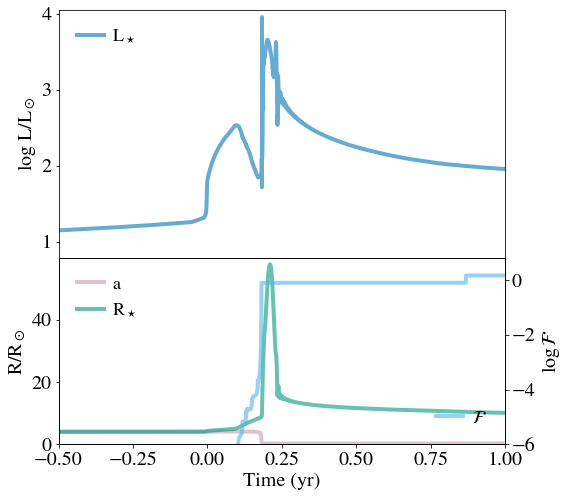

In [69]:
import matplotlib.pyplot as plt
import numpy as np


alpha = 0.6
lw = 4

# use width_ratios to define the width of each subplot
# depending on the range we want to plot
f, (ax1, ax2)  = plt.subplots(2, 1, sharey=False, 
                                  gridspec_kw={'height_ratios': (2, 1.5)},figsize=(8,8))


plt.subplots_adjust(wspace=0, hspace=0)

tot = np.concatenate((grazing,plungein, relaxation), axis=None)


ax1.plot(age[tot],logl[tot],linewidth=lw,alpha=alpha,label=r'L$_\star$',c=BLUE)
#ax1b = ax1.twinx()

ax1.set_ylim(min(logl[tot])-dy,max(logl[tot])+dy)  

ax2.plot(age[tot],planet_location[tot],linewidth=lw,alpha=alpha,label='a',c=RED_PURPLE)
ax2.plot(age[tot],star_radius[tot],linewidth=lw,alpha=alpha,label=r'R$_\star$',c=BLUE_GREEN)
ax2b = ax2.twinx()
ax2b.plot(age[tot],np.log10(dest[tot]),linewidth=lw,alpha=alpha,label=r'$\mathcal{F}$',c=SKY_BLUE )

ax1.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)
ax2.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)
ax2b.legend(handlelength=1.5,frameon=False,loc="lower right",fontsize=18)


#ax2.set_yscale('log')

dy = 0.1
ax2b.set_ylim(-6,0.8)   
ax2.set_xlim(-0.5,1)
ax1.set_xlim(-0.5,1)
ax2.set_ylim(0,np.max(star_radius[tot])+2)

ax1.set_xticklabels([])

ax2.set_xlabel(r'Time (yr)')
ax1.set_ylabel(r'$\log$ L/${\rm L}_\odot$')
ax2.set_ylabel(r'R/${\rm R}_\odot$')
ax2b.set_ylabel(r'$\log \, \mathcal{F}$')

#plt.savefig("./paper/lightcurve.pdf",bbox_inches='tight')
